In [46]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
import numpy as np

In [3]:
t1 = torch.rand(2,3,5)

In [4]:
t1

tensor([[[5.2707e-01, 9.0289e-01, 7.7561e-01, 5.7667e-01, 4.6124e-01],
         [2.4440e-02, 4.2369e-01, 7.8974e-01, 2.8141e-01, 3.4750e-01],
         [4.2829e-01, 1.9010e-01, 9.9269e-01, 9.9751e-01, 2.2843e-01]],

        [[4.0589e-01, 3.5589e-01, 9.1784e-01, 3.3824e-01, 9.8110e-01],
         [2.0503e-01, 5.0038e-04, 4.2919e-01, 2.5623e-01, 6.8210e-02],
         [1.6590e-01, 3.7799e-01, 4.7668e-01, 8.6247e-01, 2.4886e-01]]])

In [5]:
x = torch.tensor([2,3])

In [6]:
y= x.new_ones(5,3)
x = torch.rand(5,3)
x+y

tensor([[1.3605, 1.5935, 1.6973],
        [1.8334, 1.8493, 1.1080],
        [1.4946, 1.5221, 1.6311],
        [1.4520, 1.2881, 1.2642],
        [1.5869, 1.0501, 1.5267]])

In [7]:
torch.add(x,y) == x+y 

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [8]:
x.add_(y)

tensor([[1.3605, 1.5935, 1.6973],
        [1.8334, 1.8493, 1.1080],
        [1.4946, 1.5221, 1.6311],
        [1.4520, 1.2881, 1.2642],
        [1.5869, 1.0501, 1.5267]])

In [9]:
x.view(15)

tensor([1.3605, 1.5935, 1.6973, 1.8334, 1.8493, 1.1080, 1.4946, 1.5221, 1.6311,
        1.4520, 1.2881, 1.2642, 1.5869, 1.0501, 1.5267])

In [10]:
x.reshape(3,-1)

tensor([[1.3605, 1.5935, 1.6973, 1.8334, 1.8493],
        [1.1080, 1.4946, 1.5221, 1.6311, 1.4520],
        [1.2881, 1.2642, 1.5869, 1.0501, 1.5267]])

In [11]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [12]:
y = 3*x + 7
print(y)

tensor([[10., 10.],
        [10., 10.]], grad_fn=<AddBackward0>)


In [13]:
z = 2*y**2
w = z.mean()

print(z, w)

tensor([[200., 200.],
        [200., 200.]], grad_fn=<MulBackward0>) tensor(200., grad_fn=<MeanBackward0>)


In [14]:
w.backward()

In [15]:
x.grad

tensor([[30., 30.],
        [30., 30.]])

In [16]:
z.grad

In [17]:
y.grad

In [18]:
n=1000

In [19]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[0.0360, 1.0000],
        [0.1578, 1.0000],
        [0.7481, 1.0000],
        [0.0599, 1.0000],
        [0.1120, 1.0000]])

In [20]:
a = torch.tensor([3.,2]); a

tensor([3., 2.])

In [21]:
y = x@a + torch.randn(n)/3

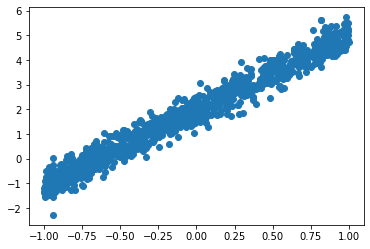

In [22]:
plt.scatter(x[:,0], y)

In [23]:
def mse(y, y_pred): 
    return ((y - y_pred)**2).mean()

In [24]:
theta = (torch.t(x)@x) .inverse() @ torch.t(x) @ y

In [25]:
theta

tensor([3.0221, 1.9849])

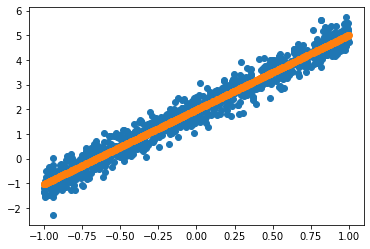

In [26]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@theta)

In [27]:
a_guess = nn.Parameter(torch.tensor([-1.,1]))

In [28]:
lr = 1e-1
for t in range(50): 
    y_hat = x@a_guess
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a_guess.sub_(lr * a_guess.grad)
        a_guess.grad.zero_()

tensor(6.5940, grad_fn=<MeanBackward0>)
tensor(1.4796, grad_fn=<MeanBackward0>)
tensor(0.4448, grad_fn=<MeanBackward0>)
tensor(0.2004, grad_fn=<MeanBackward0>)
tensor(0.1422, grad_fn=<MeanBackward0>)


In [29]:
print(a_guess)

Parameter containing:
tensor([2.9102, 1.9827], requires_grad=True)


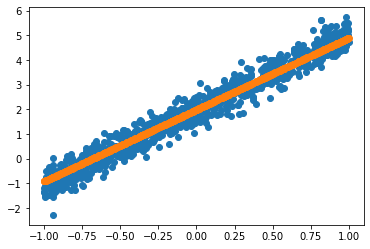

In [30]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a_guess.detach())

In [31]:
4*torch.rand(2)

tensor([2.3905, 2.7217])

In [32]:
num_samples = 10_000
x= []
for num in range(1, num_samples+1):
    x.append(4*torch.rand(2))

In [33]:
def run_model(model):
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.MSELoss()
    
    total_loss = []
    

    for num in range(1, num_samples+1):
        # Progress bar indicator
        if num % (num_samples//5) == 0:
            print('{0}: %: {1:.3f}'.format(num,num/num_samples * 100))
            
        # data prep
        
        data, target = Variable(x[num-1]), Variable(x[num-1][0] + x[num-1][1])
        
        # Feed forward through NN
        output = model(data)
        loss = criterion(output, target)
        total_loss.append(loss)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return total_loss

In [34]:
def plot(total_loss):
    fig,ax=plt.subplots(figsize=(11,8))
    ax.plot(total_loss,marker='.',ls='',markersize=1.)
    ax.set_ylim(0,)
    ax.set_xlim(0,)
    ax.grid(alpha=0.2)
    ax.set_xlabel('training examples')
    ax.set_ylabel('mean squared loss')

2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


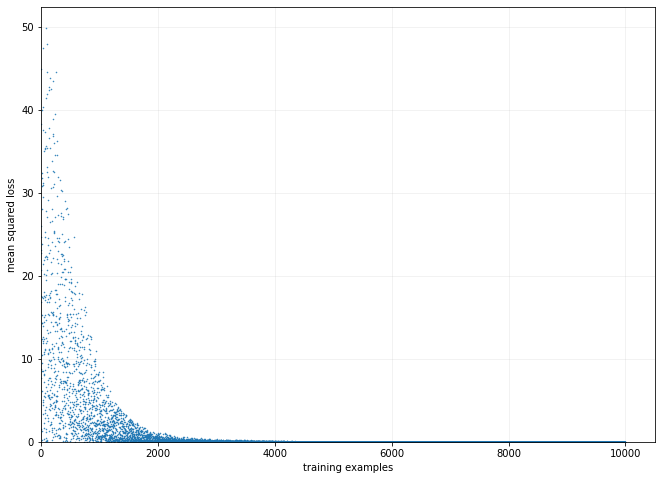

In [35]:
model = nn.Sequential(
    nn.Linear(2, 1, bias=False))
total_loss =run_model(model)
plot(total_loss)

2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


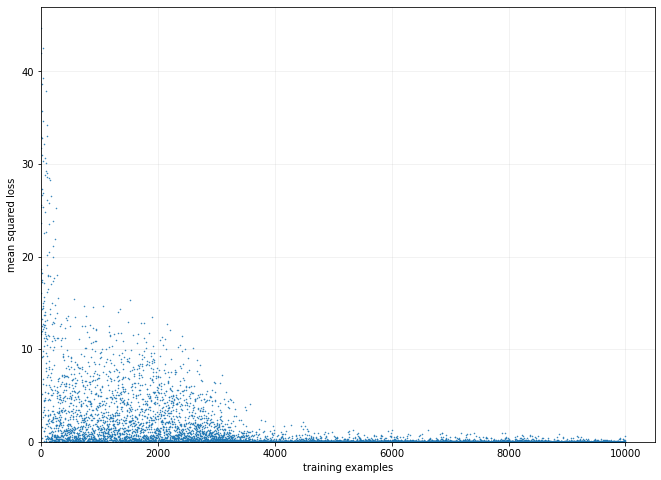

In [36]:
model = nn.Sequential(
            nn.Linear(2, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 1))

total_loss =run_model(model)
plot(total_loss)

2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


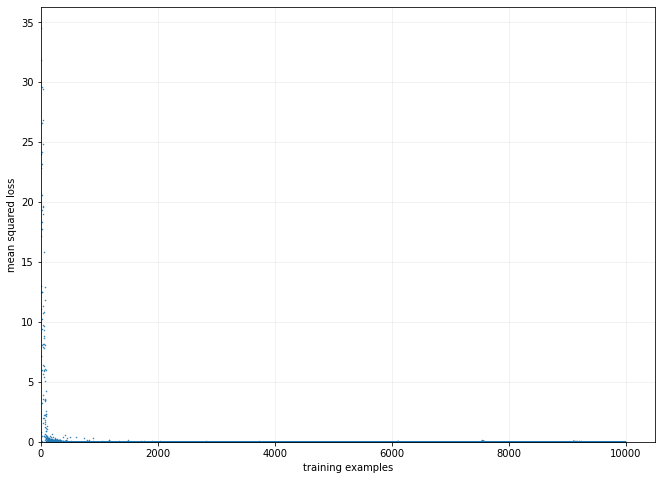

In [37]:
model = nn.Sequential(
            nn.Linear(2, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1))

total_loss =run_model(model)
plot(total_loss)

In [38]:
x,y = np.linspace(-5,8,100),[]

In [39]:
for xx in x:
    y.append(model(torch.tensor([xx,2],dtype=torch.float32)).data.cpu().numpy()[0])

In [40]:
y[99]

10.0729885

In [41]:
x[99]+2

10.0

In [42]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
 
data_transforms = {
    'train':
        transforms.Compose([
            transforms.Resize((224,224)),
            transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor()]),
    'validation':
        transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()])}
 
image_datasets = {
    'train':
        datasets.ImageFolder('data/cva_data/train', data_transforms['train']),
    'validation':
        datasets.ImageFolder('data/cva_data/validation', data_transforms['validation'])}
 
dataloaders = {
    'train':
        torch.utils.data.DataLoader(
            image_datasets['train'],
            batch_size=32,
            shuffle=True,
            num_workers=4),
    'validation':
        torch.utils.data.DataLoader(
            image_datasets['validation'],
            batch_size=32,
            shuffle=False,
            num_workers=4)}

In [51]:
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/rajagopalps/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 18.0MB/s]


In [52]:
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [54]:
# freeze the weights
for param in model.parameters():
    param.requires_grad = False
    
# modify the final layer of resnet50 (called 'fc')
# originally model.fc = nn.Linear(2048, 1000) for the 1000 image classes
# we modify it to our specific needs

model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    # inplace=True is a shortcut to not modify the forward method 
    nn.ReLU(inplace=True),
    nn.Linear(128, 2))
 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters())

In [55]:
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [57]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
 
            running_loss = 0.0
            running_corrects = 0
 
            for inputs, labels in dataloaders[phase]:
                inputs = inputs
                labels = labels
 
                outputs = model(inputs)
                loss = criterion(outputs, labels)
 
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
 
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
 
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
 
            print(f'{phase} loss: {epoch_loss}, acc: {epoch_acc}')
    return model
 
model_trained = train_model(model, criterion, optimizer, num_epochs=3)

Epoch 1/3
----------
train loss: 0.6963455269373761, acc: 0.5569948186528497
validation loss: 0.5944013906286117, acc: 0.6276595744680851
Epoch 2/3
----------
train loss: 0.5321270690680785, acc: 0.7435233160621761
validation loss: 0.43091180159690534, acc: 0.8936170212765957
Epoch 3/3
----------
train loss: 0.39489556995698205, acc: 0.8808290155440415
validation loss: 0.32838395618377847, acc: 0.9042553191489362
